# **Actividad Regresión Lineal 2**

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import f
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/breast_cancer.csv', index_col=0)

## Base de datos completa. No se observan valores faltantes. En caso de haberlos se realiza imputación simple.

In [4]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Mostrar que las variables regresoras son independientes. En caso de no serlo realizar el procedimiento correspondiente.

In [5]:
regresoras = df.drop(['diagnosis'], axis=1)

In [6]:
correlacion = regresoras.corr()

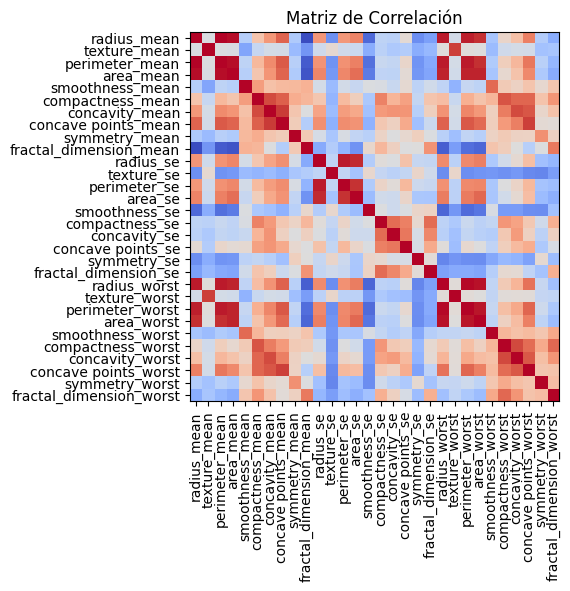

In [7]:
plt.imshow(correlacion, cmap='coolwarm', interpolation='nearest')
plt.title("Matriz de Correlación")
plt.xticks(range(len(regresoras.columns)), regresoras.columns, rotation=90)
plt.yticks(range(len(regresoras.columns)), regresoras.columns)
plt.show()

In [8]:
scaler = StandardScaler()

In [9]:
regresoras_estandarizadas = scaler.fit_transform(regresoras)

## Hipótesis nula de los coeficientes de regresión. Estadístico de prueba, distribución del estadístico de prueba. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [10]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].replace({'B': 0, 'M': 1})

In [11]:
x = sm.add_constant(x)

In [12]:
correlacion = x.corr()

In [13]:
feat_correlacion = set()
for i in range(len(correlacion.columns)):
    for j in range(i):
        if abs(correlacion.iloc[i, j]) > 0.8:
            col = correlacion.columns[i]
            feat_correlacion.add(col)

In [14]:
x = x.drop(feat_correlacion, axis=1)

In [15]:
modelo = sm.Logit(y, x)
modelo = modelo.fit()

Optimization terminated successfully.
         Current function value: 0.086848
         Iterations 11


In [16]:
resultados = modelo.summary()

In [17]:
print(resultados)

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.8685
Time:                        22:09:08   Log-Likelihood:                -49.417
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.585e-131
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -41.1377     11.153     -3.689      0.000     -62.997     -19.278
radius_mean                1.1359      0.303      3.753      0.000       0.543       1.729
text

In [18]:
grados_libertad = len(y) - len(modelo.params)

In [19]:
nivel_confianza = 0.95

In [20]:
valor_critico = t.ppf(1-(1-nivel_confianza)/2, df=grados_libertad)

In [21]:
t_values = np.linspace(-3, 3, 1000)

In [22]:
pdf_t = t.pdf(t_values, df=grados_libertad)

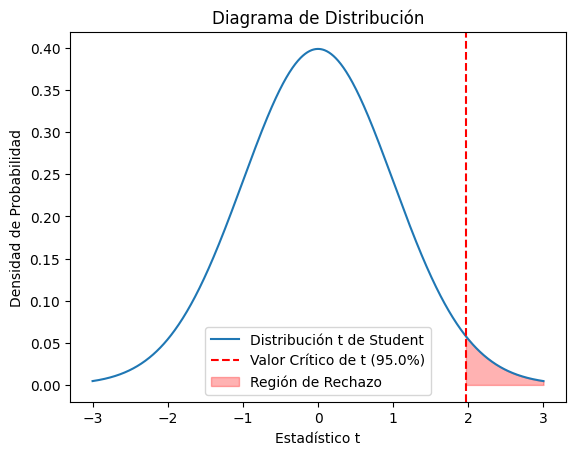

In [23]:
plt.plot(t_values, pdf_t, label='Distribución t de Student')
plt.axvline(x=valor_critico, color='red', linestyle='--', label=f'Valor Crítico de t ({nivel_confianza*100}%)')
plt.fill_between(t_values, 0, pdf_t, where=(t_values > valor_critico), color='red', alpha=0.3, label='Región de Rechazo')
plt.xlabel('Estadístico t')
plt.ylabel('Densidad de Probabilidad')
plt.title('Diagrama de Distribución')
plt.legend()
plt.show()

## Hipótesis nula de la significancia del modelo (prueba F-Fisher). Menciona que distribución tiene el estadístico de prueba con qué número de grados de libertad. Para un 95% de confianza realiza un diagrama en donde se muestre la distribución del estadístico de prueba, la zona de aceptación y la zona de rechazo.

In [24]:
modelo_completo = sm.OLS(y, x).fit()

In [25]:
modelo_nulo = sm.OLS(y, [1] * len(x)).fit()

In [26]:
f_statistic = (modelo_nulo.ssr - modelo_completo.ssr) / (modelo_completo.ssr / (len(x.columns) - 1))

In [27]:
dfn = len(x.columns) - 1
dfd = len(y) - len(x.columns)

In [28]:
print("Grados de libertad")
print("dfn:",dfn)
print("dfd:",dfd)

Grados de libertad
dfn: 13
dfd: 555


In [29]:
alpha = 0.05
valor_critico = f.ppf(1 - alpha, dfn, dfd)

In [30]:
f_statistic

31.887508605293082

In [31]:
valor_critico

1.7378075214257032

In [32]:
x = np.linspace(0, 5, 1000)

In [33]:
pdf = f.pdf(x, dfn, dfd)

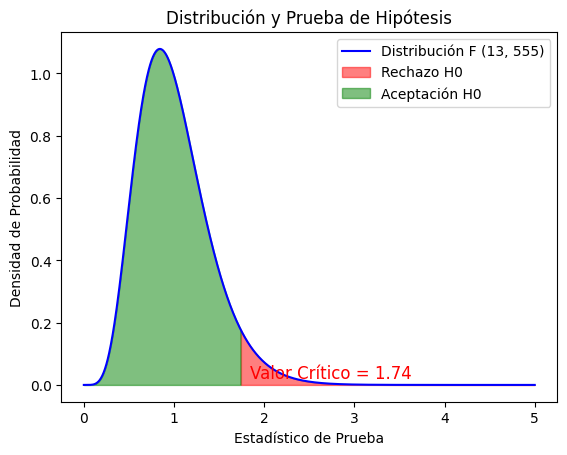

In [34]:
plt.plot(x, pdf, label=f'Distribución F ({dfn}, {dfd})', color='blue')
plt.fill_between(x, pdf, where=(x > valor_critico), color='red', alpha=0.5, label='Rechazo H0')
plt.text(valor_critico + 0.1, 0.02, f'Valor Crítico = {valor_critico:.2f}', fontsize=12, color='red')
plt.fill_between(x, pdf, where=(x <= valor_critico), color='green', alpha=0.5, label='Aceptación H0')
plt.title('Distribución y Prueba de Hipótesis')
plt.xlabel('Estadístico de Prueba')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()

## Realiza un modelo de regresión hacia atrás (backward). Explica el criterio para ir eliminando variables del modelo.

In [35]:
x = pd.DataFrame(x)

In [36]:
while True:
    variable_p_valor_top = modelo.pvalues.idxmax()

    if modelo.pvalues.max() > 0.05:
        if variable_p_valor_top in x.columns:
            X = x.drop(variable_p_valor_top, axis=1)
            modelo = sm.Logit(y, sm.add_constant(X)).fit()
        else:
            break
    else:
        break

In [37]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      555
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Sep 2023   Pseudo R-squ.:                  0.8685
Time:                        22:09:09   Log-Likelihood:                -49.417
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.585e-131
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -41.1377     11.153     -3.689      0.000     -62.997     -19.278
radius_mean                1.1359      0.303      3.753      0.000       0.543       1.729
text

## Comparación entre datos reales y predicción. Análisis de los resultados.

In [38]:
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].replace({'B': 0, 'M': 1})

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = modelo.predict(X_test)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print("MSE:",mse)
print("R2:",r2)

MSE: 0.06410886247029421
R2: 0.7271016126223571


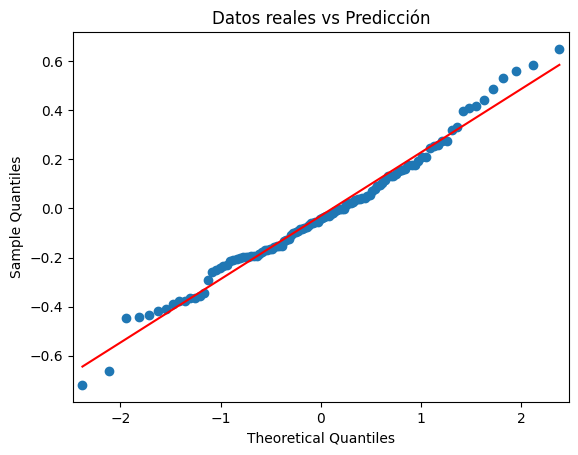

In [44]:
residuos = y_test - y_pred
sm.qqplot(residuos, line='r')
plt.title('Datos reales vs Predicción')
plt.show()

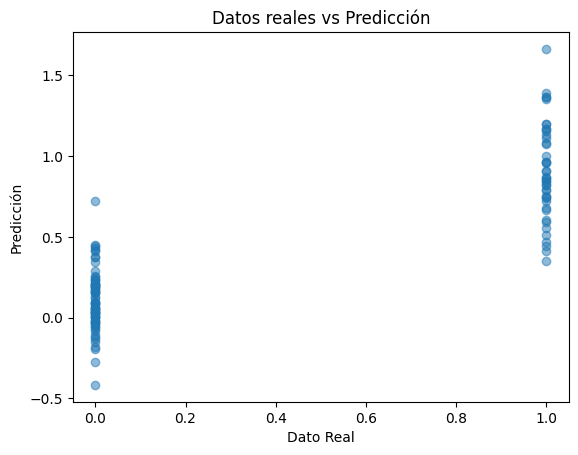

In [45]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Dato Real')
plt.ylabel('Predicción')
plt.title('Datos reales vs Predicción')
plt.show()

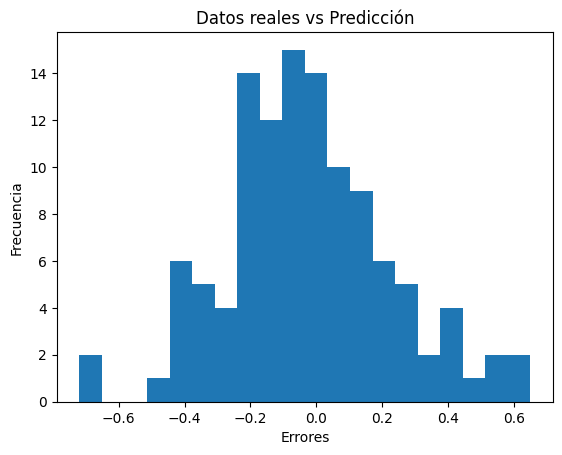

In [46]:
plt.hist(residuos, bins=20)
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Datos reales vs Predicción')
plt.show()